## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Analysing Data

In [2]:
df=pd.read_csv("./Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Cleaning

#### Checking for missing/null values

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Checking for duplicated values

In [7]:
df["CustomerID"].duplicated().sum()

0

#### Keeping only necessary features : we don't need customer id column for KMeans CLustering

In [8]:
df=df.drop("CustomerID",axis=1)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Checking for any outlier : outlier can't exist on Gender column since it is classification column

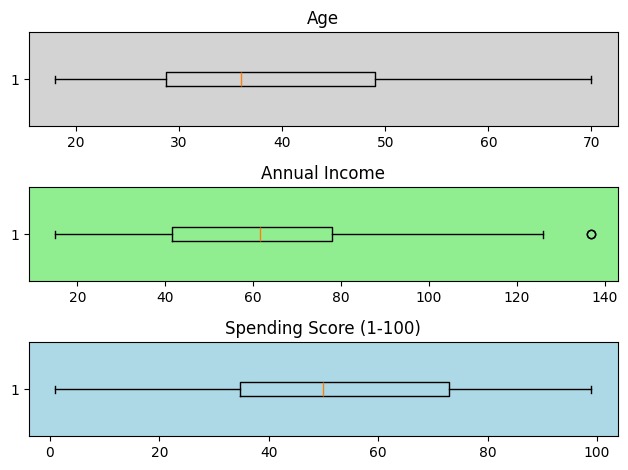

In [10]:
plt.subplot(3,1,1,facecolor="lightgrey")
plt.boxplot(df['Age'], vert=False)
plt.title("Age")

plt.subplot(3,1,2,facecolor="lightgreen")
plt.boxplot(df['Annual Income (k$)'], vert=False)
plt.title("Annual Income")

plt.subplot(3,1,3,facecolor="lightblue")
plt.boxplot(df['Spending Score (1-100)'], vert=False)
plt.title("Spending Score (1-100)")

plt.tight_layout()
plt.show()

##### oulier exist in Annual income so we need to remove it 

In [11]:
# calculate summary statistics 
mean = df["Annual Income (k$)"].mean() 
std  = df["Annual Income (k$)"].std() 
  
# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2

print("Annual Income")
print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 
  
# Drop the outliers 
df = df[(df["Annual Income (k$)"] >= lower_bound) & (df["Annual Income (k$)"] <= upper_bound)]

Annual Income
Lower Bound : 8.030557669457515
Upper Bound : 113.08944233054248


Text(0.5, 1.0, 'Annual Income')

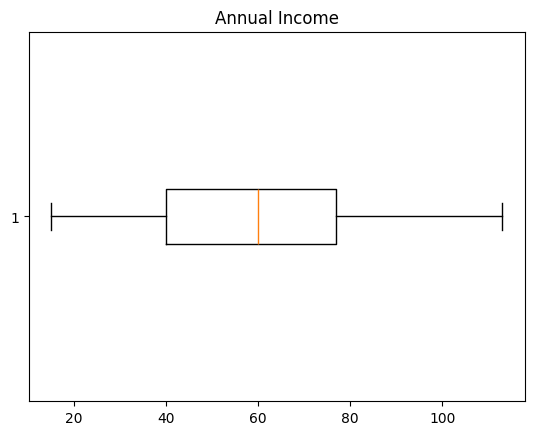

In [12]:
plt.boxplot(df['Annual Income (k$)'], vert=False)
plt.title("Annual Income")

In [13]:
df.shape

(194, 4)

#### Now Our Dataset is ready for applying ML Model : KMeans Clustering

## Applying ML model : KMeans Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### here before proceeding with the dataset we need to convert Gender column into integer form : Male - 1 & Female - 0

In [16]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Determining K value

In [18]:
X=df.iloc[:,:]

In [19]:
wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

In [20]:
wcss

[275244.6288659794,
 183967.60235191637,
 135959.09921313255,
 93710.4530888031,
 64130.119226903575,
 47102.70317650186,
 44043.229409479405,
 40051.91284474409,
 37246.34280161867,
 34334.95342902711,
 31662.568566645772,
 30318.358365245866,
 28555.53104789476,
 25864.00036075036,
 24507.757027372354,
 24029.443949179473,
 21367.919701213817,
 20491.674814439946,
 19738.578764454498,
 18065.83443223443]

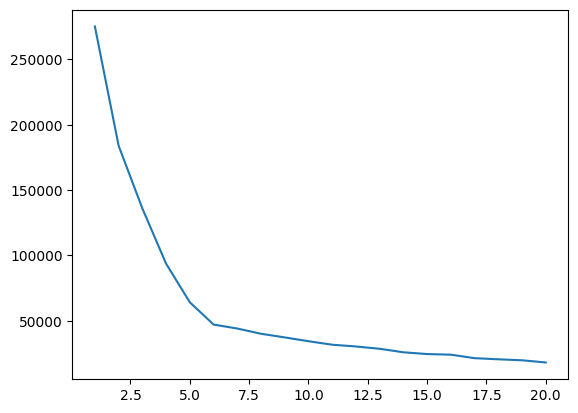

In [21]:
plt.plot(range(1,21),wcss)

#### we can see from the plot that there could be 5 cluster since the steepness of plot decreases at 5 so K value = 5

In [22]:
km=KMeans(n_clusters=5)

In [23]:
km.fit(X)

KMeans(n_clusters=5)

In [24]:
Y_pred=km.predict(X)

In [25]:
Y_pred

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3])

In [26]:
X[Y_pred==3].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,1,39,69,91
125,0,31,70,77
127,1,40,71,95
129,1,38,71,75
131,1,39,71,75


##### these are those datapoints which belong to cluster 3

##### Here We can't visualise datapoints in thier respective cluster since it is 4d data so to viualise we need to perform dimensionality reduction ie, converting 4d data to 2d/3d data via PCA or LDA

## Using PCA for Data Viualisation

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [28]:
pca.fit(df)

PCA(n_components=2)

In [29]:
transformed_data=pca.transform(df)
transformed_data

array([[ 8.86067439e+00, -4.31613041e+01],
       [-3.14357334e+01, -4.55207435e+01],
       [ 4.10603372e+01, -4.02589799e+01],
       [-2.71486432e+01, -4.42551682e+01],
       [ 1.05674532e+01, -4.09833845e+01],
       [-2.64715800e+01, -4.32198554e+01],
       [ 4.44388562e+01, -3.79629154e+01],
       [-4.37683647e+01, -4.32300229e+01],
       [ 5.40563285e+01, -3.62128112e+01],
       [-2.08437233e+01, -4.08351512e+01],
       [ 4.40801130e+01, -3.67812800e+01],
       [-4.58821485e+01, -4.22777143e+01],
       [ 4.09485709e+01, -3.60211516e+01],
       [-2.71562555e+01, -4.02425210e+01],
       [ 3.79925259e+01, -3.63254492e+01],
       [-2.95624726e+01, -4.03956727e+01],
       [ 1.61123627e+01, -3.66251476e+01],
       [-1.74721202e+01, -3.86947982e+01],
       [ 2.57820886e+01, -3.39452769e+01],
       [-4.51524785e+01, -3.82279206e+01],
       [ 1.59331083e+01, -3.36295789e+01],
       [-2.32802808e+01, -3.60002893e+01],
       [ 4.75537709e+01, -3.06988194e+01],
       [-2.

In [30]:
temp_df = pd.DataFrame({
    "PC1(Feature1)" : transformed_data[:,0],
    "PC2(Fearure2)" : transformed_data[:,1]
})
temp_df.head()

,PC1(Feature1),PC2(Fearure2)
0,8.860674,-43.161304
1,-31.435733,-45.520743
2,41.060337,-40.258980
3,-27.148643,-44.255168
4,10.567453,-40.983385


In [31]:
temp_df['Cluster'] = Y_pred
temp_df.head()

,PC1(Feature1),PC2(Fearure2),Cluster
0,8.860674,-43.161304,4
1,-31.435733,-45.520743,1
2,41.060337,-40.258980,4
3,-27.148643,-44.255168,1
4,10.567453,-40.983385,4


### Scatterplot to show clusters

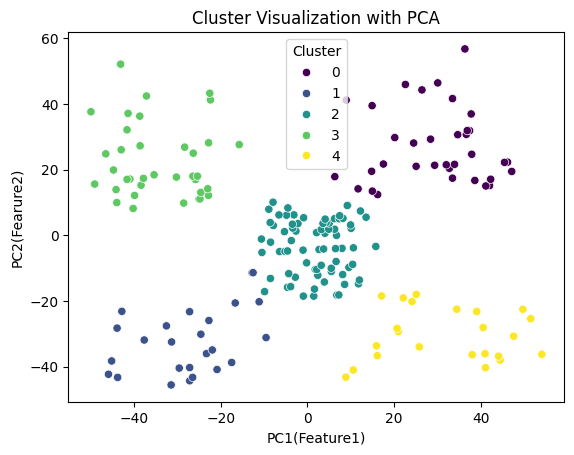

In [32]:
sns.scatterplot(x=temp_df.iloc[:,0], y=temp_df.iloc[:,1], hue=temp_df['Cluster'], palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.show()